###สมาชิกกลุ่ม


สรวิชญ์  เสริมทรัพย์  2013110198

ไกรวิชณ์ ชินชนะถาวร 2013110529

ชุติพงศ์ พันธ์แสนทวีกุล 2013110016

#**การคาดการณ์การลาออกของพนักงานในกลุ่มตัวอย่าง**

1.อธิบายวัตถุประสงค์ (สามารถตั้งคำถามที่เป็นประโยชน์ต่อธุรกิจหรือสังคมได้)
- เพื่อตรวจสอบหรือลองคาดการณ์แนวโน้มได้ว่าจะมีพนักงานคนไหนที่จะลาออกจากบริษัทปัจจุบันได้อีก
- สามารถนำข้อมูลนี้ไปใช้ในการปรับปรุงสวัสดิการหรือช่วยเหลือพนักงานบริษัทได้ง่ายขึ้น
- สามารถนำข้อมูลไปใช้ร่วมกับกฎหมายแรงงานได้เพื่อตรวจสอบบริษัท
- ช่วยในการบริหารประสิทธิภาพการทำงานและสุขภาพจิตพนักงานภายในบริษัท

2.การทำ Data Aquisition //A.K.A บอกแหล่งที่มาของข้อมูล
- https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

##3.อธิบายข้อมูล (สามารถทำ Exploratory Data Analysis)

In [1]:
import pandas as pd
#!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
#mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
#mpl.rc('font', family='TH Sarabun New') #Insert Thai Fonts first

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.svm import SVC
import numpy as np

In [3]:
df = pd.read_csv('/Users/chutipongpansantaveekun/Documents/Work/4th Year/1st Semmester/ITE-436 Data Mining/Project/HR_Employee_Attrition.csv')

In [4]:
df.shape

(499, 35)

In [5]:
df.sample(n = 3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
379,21,Yes,Travel_Rarely,337,Sales,7,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
365,31,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,1761,...,1,80,3,10,2,3,1,0,0,0
355,31,No,Travel_Rarely,1003,Sales,5,3,Technical Degree,1,1749,...,3,80,1,6,3,3,5,2,0,2


In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
2,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
3,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
4,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##4.ขั้นตอนการเตรียมข้อมูล (สามารถทำ Data Preparation Process ได้อย่างเหมาะสมและมีเหตุผล)

###4.1 ตัดคอลัมน์ที่ไม่เกี่ยวข้องกับการวิเคราะห์ออก

In [8]:
#อันดับแรกเราต้องมาพิจารณาก่อนว่าข้อมูลไหนสามารถนำมาใช้งานได้บ้างโดยจะคัดมาจากทั้งหมด 35 คอลัมน์
df.columns
#'อายุ','การลาอออก','ความถี่ในการไปทำงานที่บริษัท','อัตราค่าจ้างรายวัน','แผนกที่ทำงาน','ระยะห่างระหว่างบ้านและบริษัท','ระดับการศึกษาจากเริ่มต้นถึงชำนาญ(1-5)'
#'หลักสูตรที่จบมา','จำนวนพนักงาน?','หมายเลข ID พนักงาน','ระดับความพึงพอใจในสภาพแวดล้อมการทำงานตั้งแต่แย่จนถึงดีมาก(1-4)','เพศ','อัตรค่าจ้างรายชั่วโมง','ระดับความมีส่วนร่วมในงานตั้งแต่เท่าที่จำเป็นจนถึงมีส่วนร่วมทุกงาน(1-4)'
#'ระดับของพนักงานตั้งแต่ junior ถึง manager(1-5)','ตำแหน่งงาน','ระดับความพึงพอใจในการทำงานตั้งแต่แย่จนถึงดีมาก(1-4)','สถานภาพการสมรส','รายรับที่มีต่อเดือน','อัตราค่าจ้างต่อเดือน','ผ่านการทำงานมากี่บริษัทแล้ว'
#'อายุเกิน 18 ปีหรือไม่','ทำโอทีหรือไม่','อัตราเพิ่มเงินเดือน','คะแนนการประเมินพนักงานตั้งแต่ดีและเยี่ยม(3-4)','ระดับความสัมพันธ์ในที่ทำงาน(1-4)','การทำงานชั่วโมงต่อสัปดาห์','หุ้นที่พนักงานถือร่วมกับบริษัทอยู่'
#'ทำงานมาทั้งหมดกี่ปี','ผ่านการฝึกงานมาแล้วกี่ปี','สมดุลการทำงาน(1-4)','บริษัทที่ทำงานอยู่ทำมากี่ปี','ทำหน้าที่นี้มากี่ปี','ได้รับการโปรโมตล่าสุดเมื่อไหร่','อยู่กับ manager คนปัจจุบันมากี่ปี'

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#ทำการตัดคอลัมน์ที่ไม่ได้ใช้ในการวิเคราะห์
df = df.drop(df.columns[[2, 3, 5, 6, 7, 8, 9, 11, 12, 17, 18, 20, 21, 26, 27, 29]], axis=1)
#'อัตราค่าจ้างรายวัน & 'รายรับที่มีต่อเดือน' & 'อัตรค่าจ้างรายชั่วโมง' = เราจะใช้อัตราเงินเดือนเป็นตัวแทนของรายรับพนักงานทั้งหมดแทนในการทดสอบ
#'ระดับการศึกษาจากเริ่มต้นถึงชำนาญ(1-5)','หลักสูตรที่จบมา','จำนวนพนักงาน?','หมายเลข ID พนักงาน','สถานภาพการสมรส','หุ้นที่พนักงานถือร่วมกับบริษัทอยู่','ผ่านการฝึกงานมาแล้วกี่ปี','ระยะห่างระหว่างบ้านและบริษัท','ความถี่ในการไปทำงานที่บริษัท' = เป็นข้อมูลไม่จำเป็น
#'อายุเกิน 18 ปีหรือไม่','การทำงานชั่วโมงต่อสัปดาห์' = เป็นข้อมูลที่มีขนาดเท่ากัน

In [10]:
df #ชุดข้อมูลใหม่ที่แก้ไขแล้ว

,Age,Attrition,Department,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,3,2,Sales Executive,4,19479,Yes,11,3,1,8,1,6,4,0,5
1,37,Yes,Research & Development,4,2,1,Laboratory Technician,3,2396,Yes,15,3,2,7,3,0,0,0,0
2,28,Yes,Research & Development,3,2,1,Laboratory Technician,3,12947,Yes,14,3,2,6,3,4,2,0,3
3,36,Yes,Sales,3,2,1,Sales Representative,1,6986,No,23,4,2,10,3,5,3,0,3
4,34,Yes,Research & Development,2,3,1,Research Scientist,1,17102,No,11,3,3,8,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,23,Yes,Sales,4,3,1,Sales Representative,1,26956,No,19,3,1,1,2,1,0,1,0
495,29,Yes,Research & Development,1,3,1,Research Scientist,4,26124,Yes,14,3,2,4,4,2,2,2,2
496,56,Yes,Research & Development,4,3,1,Laboratory Technician,3,3666,No,11,3,4,14,1,10,9,9,8
497,50,Yes,Sales,2,3,2,Sales Executive,3,14255,No,12,3,4,12,3,6,3,0,1


In [11]:
df.columns

Index(['Age', 'Attrition', 'Department', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

###4.2 เช็ค Data

In [12]:
df.describe()
#มีข้อมูลพนักงานทั้งหมด 1470 คน
#อายุเฉลี่ยอยู่ที่ 36 ปี มีอายุตั้งแต่ 18 - 60 ปี

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,35.607214,2.609218,2.641283,1.879760,2.613226,14468.394790,15.176353,3.152305,2.711423,10.038076,2.717435,6.182365,3.643287,2.122244,3.631263
std,9.148816,1.120095,0.761511,1.042072,1.116104,7367.089193,3.646113,0.359676,1.085173,7.462123,0.756708,6.000068,3.523446,3.158320,3.395648
min,18.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,2.000000,1.000000,2.000000,7944.500000,12.000000,3.000000,2.000000,5.000000,2.000000,2.000000,1.000000,0.000000,1.000000
50%,34.000000,3.000000,3.000000,2.000000,3.000000,14511.000000,14.000000,3.000000,3.000000,9.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,42.000000,4.000000,3.000000,2.000000,4.000000,21081.500000,17.500000,3.000000,4.000000,12.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,4.000000,4.000000,5.000000,4.000000,26999.000000,25.000000,4.000000,4.000000,40.000000,4.000000,40.000000,17.000000,15.000000,17.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from c

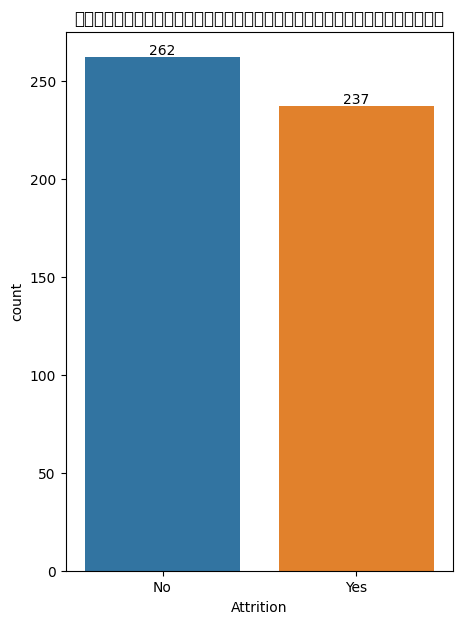

In [14]:
plt.figure(figsize=(5,7))
plt.title('จำนวนการลาออกและการทำงานต่อของพนักงาน')
ax = sns.countplot( data=df , x='Attrition', order=df['Attrition'].value_counts().index )

abs_values = df['Attrition'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

#ยังคงทำงานอยู่ 262 คน ข้อมูลทดสอบ
#ลาออกไปแล้ว 237 คน ผลเฉลย

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from c

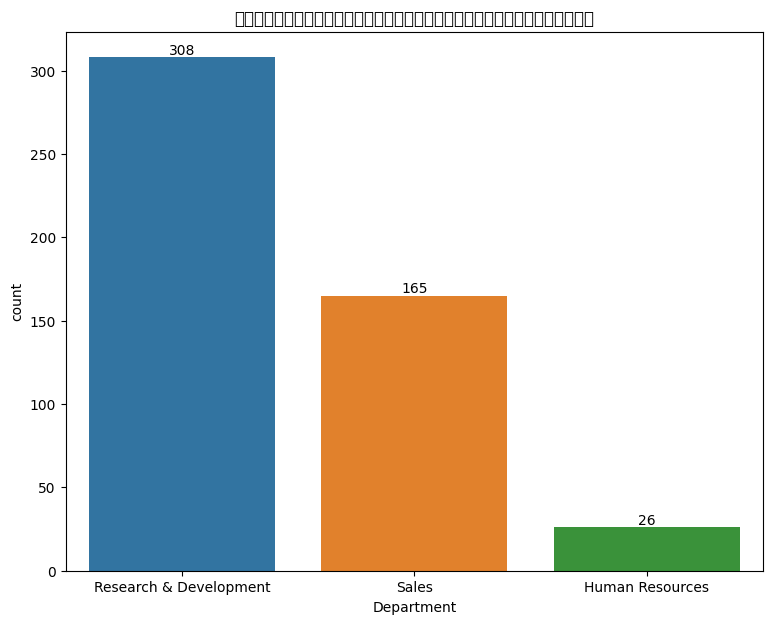

In [15]:
plt.figure(figsize=(9,7))
plt.title('จำนวนกลุ่มตัวอย่างพนักงานในแต่ละแผนก')
ax = sns.countplot( data=df , x='Department', order=df['Department'].value_counts().index )

abs_values = df['Department'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from c

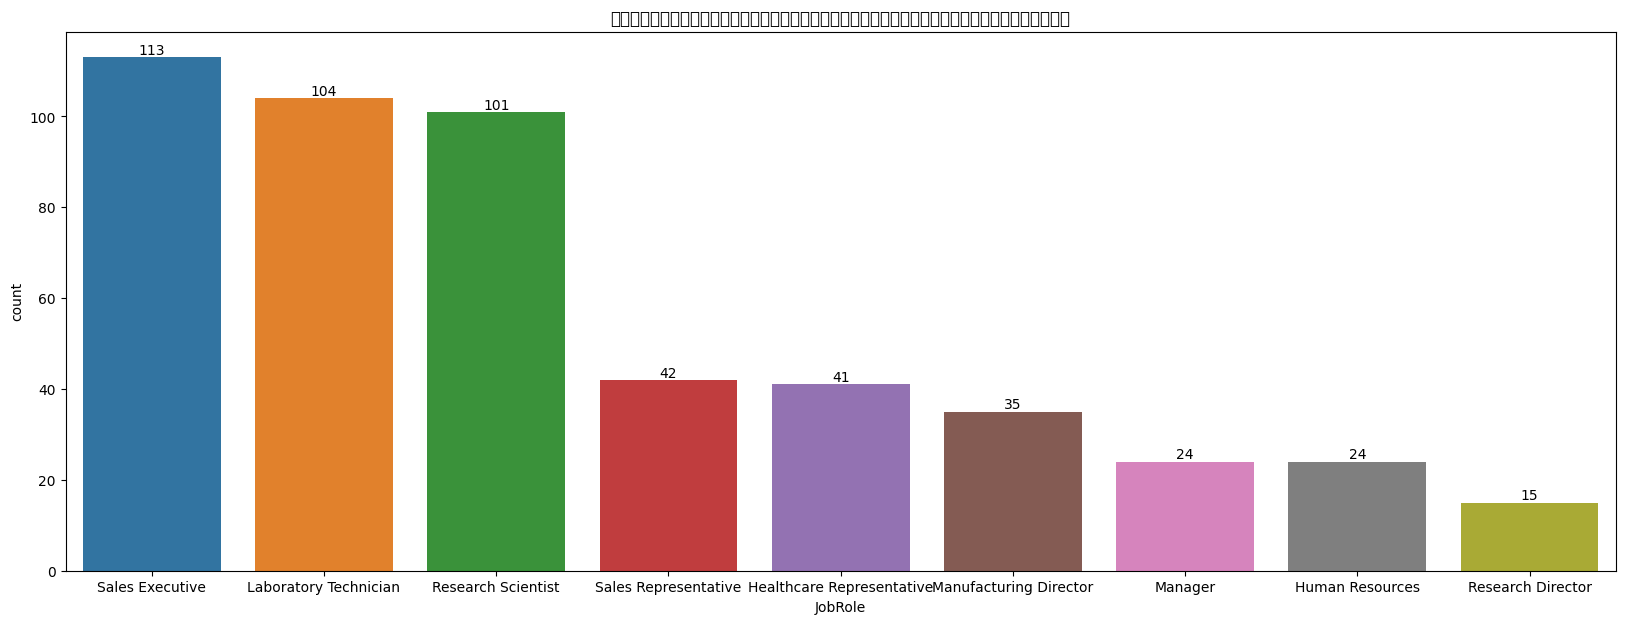

In [16]:
plt.figure(figsize=(20,7))
plt.title('จำนวนกลุ่มตัวอย่างพนักงานในแต่ละหน้าที่ตำแหน่ง')
ax = sns.countplot( data=df , x='JobRole', order=df['JobRole'].value_counts().index )

abs_values = df['JobRole'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from c

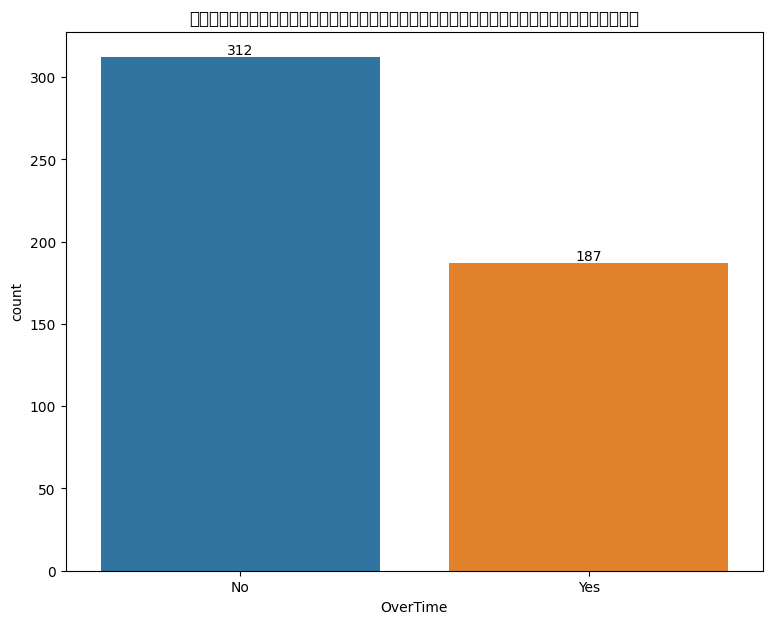

In [17]:
plt.figure(figsize=(9,7))
plt.title('จำนวนกลุ่มตัวอย่างพนักงานที่ต้องทำงานล่วงเวลา')
ax = sns.countplot( data=df , x='OverTime', order=df['OverTime'].value_counts().index )

abs_values = df['OverTime'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

In [18]:
df.dtypes

Age                          int64
Attrition                   object
Department                  object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MonthlyRate                  int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [19]:
df['OverTime'].value_counts()

OverTime
No     312
Yes    187
Name: count, dtype: int64

In [20]:
#แปลงจากตัวอักษรให้เป็นค่าตัวเลข
df['OverTime'].replace('No',0, inplace=True)
df['OverTime'].replace('Yes',1, inplace=True)

In [21]:
#แปลงจากตัวอักษรให้เป็นค่าตัวเลข
df['OverTime'].value_counts()
df['Attrition'].replace('No',0, inplace=True)
df['Attrition'].replace('Yes',1, inplace=True)

##5.การเลือกใช้โมเดล (สามารถอธิบายเหตุผล และแสดงความเข้าใจในการเลือกใช้ model ได้)

##6.การวัดผล (แสดงควาเข้าใจการวัดผล เปรียบเทียบผลลัพธ์ของแต่ละ model ได้)

###Decision Tree
> Use Because It is one of the easiest way to Classified the class and we could Easy to Interpret the result and we could look at which Feature is important into Decision Making


In [22]:
featurecol = ['Age', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyRate', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
X = df[featurecol]
#แบ่ง Column ที่เป็น Feature ที่เรานำทำ Machine Learning ไปไว้ใน "X"
y = df['Attrition']
#แบ่ง Column Attrition ที่เป็น Label ไว้ในตัวแปล "y"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.15)
#แบ่ง Train-Test Split ตาม Ratio 80:20

#### Model 1 DecisionTreeClassifier w/ entropy and max depth = 4





In [23]:
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight='balanced')
clf1.fit(X_train,y_train)
print('Decision Tree Training accuracy w/ Entropy is {:.2f}%'.format(clf1.score(X, y)*100))

Decision Tree Training accuracy w/ Entropy is 76.35%


In [24]:
#Class 0 = Stay(In Orange)
#Class 1 = Left(In Blue)
dot_data = StringIO()
export_graphviz(clf1,
                out_file=dot_data,
                feature_names = featurecol,
                #feature name is column head
                class_names=['0','1'],filled=True)
                #Label is in order of amount
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [25]:
feature_imp = pd.Series(clf1.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp
#Important Feature is Overtime , JobLevel and YearsWithCurrManager

OverTime                    0.203263
JobLevel                    0.160759
YearsSinceLastPromotion     0.143877
Age                         0.136585
YearsWithCurrManager        0.136191
JobInvolvement              0.065211
JobSatisfaction             0.057916
EnvironmentSatisfaction     0.044751
MonthlyRate                 0.025758
TotalWorkingYears           0.025688
PercentSalaryHike           0.000000
RelationshipSatisfaction    0.000000
WorkLifeBalance             0.000000
YearsAtCompany              0.000000
dtype: float64

In [26]:
#Test the model with X_test data
y_pred = clf1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65        38
           1       0.64      0.73      0.68        37

    accuracy                           0.67        75
   macro avg       0.67      0.67      0.67        75
weighted avg       0.67      0.67      0.67        75



In [27]:
print(confusion_matrix(y_test,y_pred))

[[23 15]
 [10 27]]


In [28]:
# This Model has accuracy at 72 % when test with test Data
# เนื่องจากตาม Domain ของข้อมูลเรา เรานั้นสนใจค่า Recall ของ  Class 1 เป็นพิเศษ เพื่อทำให้มีโอกาสที่จะเกิด False Negative ให้น้อยที่สุด
# Recall Score of Interested Class (Class 1)of 53 %
# f1-score of Interested Class (Class 1)of 66 %
# weighted avg f1-score of 71 %
# In the interest class it has Good Precision but it still has lower than acceptable Recall Rate (Too Many False Negative)

#### Model 2 DecisionTreeClassifier w/ gini and max depth = 4



In [29]:
clf2 = DecisionTreeClassifier(criterion='gini',max_depth=4,class_weight='balanced')
clf2.fit(X_train,y_train)
print('Decision Tree Training accuracy w/ Gini is {:.2f}%'.format(clf2.score(X, y)*100))

Decision Tree Training accuracy w/ Gini is 76.35%


In [30]:
#Class 0 = Stay(In Orange)
#Class 1 = Left(In Blue)
dot_data = StringIO()
export_graphviz(clf2,
                out_file=dot_data,
                feature_names = featurecol,
                #feature name is column head
                class_names=['0','1'],filled=True)
                #Label is in order of amount
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [31]:
feature_imp = pd.Series(clf2.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp
#Important Feature is TotalWorkingYears ,Overtime and JobLevel

OverTime                    0.237864
YearsWithCurrManager        0.156775
JobLevel                    0.152998
Age                         0.137120
YearsSinceLastPromotion     0.084233
JobInvolvement              0.074849
JobSatisfaction             0.066910
EnvironmentSatisfaction     0.043048
TotalWorkingYears           0.023983
MonthlyRate                 0.022219
PercentSalaryHike           0.000000
RelationshipSatisfaction    0.000000
WorkLifeBalance             0.000000
YearsAtCompany              0.000000
dtype: float64

In [32]:
#Test the model with X_test data
y_pred = clf2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65        38
           1       0.64      0.73      0.68        37

    accuracy                           0.67        75
   macro avg       0.67      0.67      0.67        75
weighted avg       0.67      0.67      0.67        75



In [33]:
print(confusion_matrix(y_test,y_pred))

[[23 15]
 [10 27]]


In [34]:
# This Model has accuracy at 72 % when test with test Data
# เนื่องจากตาม Domain ของข้อมูลเรา เรานั้นสนใจค่า Recall ของ  Class 1 เป็นพิเศษ เพื่อทำให้มีโอกาสที่จะเกิด False Negative ให้น้อยที่สุด
# Recall Score of Interested Class (Class 1)of 53 %
# f1-score of Interested Class (Class 1)of 66 %
# weighted avg f1-score of 71 %
# In the interest class it has Good Precision but it still has lower than acceptable Recall Rate (Too Many False Negative)

###K-Nearest Neighbour

> We use this model to calculate the nearest neighbour to look if data that has the same Label with be close together



In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf6 = KNeighborsClassifier(n_neighbors=2 , weights='uniform', algorithm='auto',  p=1, metric='minkowski', metric_params=None, n_jobs=-1,)
clf6.fit(X_train, y_train)
print('Random Forest accuracy is {:.2f}%'.format(clf6.score(X, y)*100))

Random Forest accuracy is 68.54%


In [36]:
y_pred = clf6.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.71      0.56        38
           1       0.31      0.14      0.19        37

    accuracy                           0.43        75
   macro avg       0.39      0.42      0.37        75
weighted avg       0.39      0.43      0.38        75



In [37]:
print(confusion_matrix(y_test,y_pred))

[[27 11]
 [32  5]]


In [38]:
# This Model has accuracy at 48 % when test with test Data
# เนื่องจากตาม Domain ของข้อมูลเรา เรานั้นสนใจค่า Recall ของ  Class 1 เป็นพิเศษ เพื่อทำให้มีโอกาสที่จะเกิด False Negative ให้น้อยที่สุด
# Recall Score of Interested Class (Class 1)of 18 %
# f1-score of Interested Class (Class 1)of 26 %
# weighted avg f1-score of 43 %
# This Model is not good enough

### Random Forest

> We use it because you can look at the internal process like Decision Tree But we can look at the bigger picture better



#### Model 7 DecisionTreeClassifier w/ gini and max depth = 4 with 1000 Tree


In [39]:
clf7 = RandomForestClassifier(n_estimators = 1000,max_depth = 4,criterion="gini",class_weight='balanced')
clf7.fit(X_train, y_train)
estimator = clf7.estimators_[5]
print('Random Forest accuracy is {:.2f}%'.format(clf7.score(X, y)*100))

Random Forest accuracy is 79.76%


In [40]:
#Class 0 = Stay(In Orange)
#Class 1 = Left(In Blue)
dot_data = StringIO()
export_graphviz(estimator,
                out_file=dot_data,
                feature_names = featurecol,
                #feature name is column head
                class_names=['0','1'],filled=True)
                #Label is in order of amount
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
feature_imp = pd.Series(clf7.feature_importances_,index = X_train.columns).sort_values(ascending = False)
feature_imp
#Important Feature is TotalWorkingYears ,Overtime , YearsWithCurrManager and Age

OverTime                    0.194397
TotalWorkingYears           0.126338
YearsAtCompany              0.113044
Age                         0.109635
YearsWithCurrManager        0.109043
JobLevel                    0.059209
PercentSalaryHike           0.052573
MonthlyRate                 0.051929
EnvironmentSatisfaction     0.050381
RelationshipSatisfaction    0.033284
YearsSinceLastPromotion     0.032590
JobSatisfaction             0.028758
WorkLifeBalance             0.020011
JobInvolvement              0.018808
dtype: float64

In [41]:
#Test the model with X_test data
y_pred = clf7.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        38
           1       0.77      0.62      0.69        37

    accuracy                           0.72        75
   macro avg       0.73      0.72      0.72        75
weighted avg       0.73      0.72      0.72        75



In [42]:
print(confusion_matrix(y_test,y_pred))

[[31  7]
 [14 23]]


In [43]:
# This Model has accuracy at 77 % when test with test Data
# เนื่องจากตาม Domain ของข้อมูลเรา เรานั้นสนใจค่า Recall ของ  Class 1 เป็นพิเศษ เพื่อทำให้มีโอกาสที่จะเกิด False Negative ให้น้อยที่สุด
# Recall Score of Interested Class (Class 1)of 61 %
# f1-score of Interested Class (Class 1)of 72 %
# weighted avg f1-score of 75 %
# This One has acceptable level of Recall for the interested class

#### Model 8 DecisionTreeClassifier w/ entropy and max depth = 4 with 1000 Tree





In [44]:
clf8 = RandomForestClassifier(n_estimators = 1000,max_depth = 4,criterion="entropy",class_weight='balanced')
clf8.fit(X_train, y_train)
estimator2 = clf8.estimators_[5]

print('Random Forest accuracy is {:.2f}%'.format(clf8.score(X, y)*100))

Random Forest accuracy is 79.16%


In [45]:
#Class 0 = Stay(In Orange)
#Class 1 = Left(In Blue)
dot_data = StringIO()
export_graphviz(estimator2,
                out_file=dot_data,
                feature_names = featurecol,
                #feature name is column head
                class_names=['0','1'],filled=True,)
                #Label is in order of amount
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [46]:
feature_imp = pd.Series(clf8.feature_importances_,index = X_train.columns).sort_values(ascending = False)
feature_imp
#Important Feature is TotalWorkingYears ,Overtime , YearsWithCurrManager and Age

OverTime                    0.141745
Age                         0.135930
TotalWorkingYears           0.126483
JobLevel                    0.092848
YearsWithCurrManager        0.092437
YearsAtCompany              0.088860
MonthlyRate                 0.061908
EnvironmentSatisfaction     0.051298
PercentSalaryHike           0.042918
JobSatisfaction             0.037470
JobInvolvement              0.036477
YearsSinceLastPromotion     0.036306
RelationshipSatisfaction    0.033404
WorkLifeBalance             0.021918
dtype: float64

In [47]:
#Test the model with X_test data
y_pred = clf8.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        38
           1       0.79      0.59      0.68        37

    accuracy                           0.72        75
   macro avg       0.73      0.72      0.71        75
weighted avg       0.73      0.72      0.72        75



In [48]:
print(confusion_matrix(y_test,y_pred))

[[32  6]
 [15 22]]


In [49]:
# This Model has accuracy at 76 % when test with test Data
# เนื่องจากตาม Domain ของข้อมูลเรา เรานั้นสนใจค่า Recall ของ  Class 1 เป็นพิเศษ เพื่อทำให้มีโอกาสที่จะเกิด False Negative ให้น้อยที่สุด
# Recall Score of Interested Class (Class 1)of 61 %
# f1-score of Interested Class (Class 1)of 7 %
# weighted avg f1-score of 75 %
# This One has acceptable level of Recall for the interested class But Lower than the First Random Forest

In [53]:
import pickle
filename ='projectRandomForest2.clf'
pickle.dump(clf8,open(filename,'wb'))

##7.สรุปผล (สามารถตอบคำถามตามวัตถุประสงค์ได้ อธิบายประโยชน์และการประยุกต์ใช้ได้)

จากการได้ลองนำข้อมูลกลุ่มตัวอย่างพนักงานบริษัทมาใช้ในการออกแบบร่วมกับ model เราจึงได้ model ที่แม่นยำที่สุดในการนำมาวิเคราะห์คือ Random Forest ซึ่งสามารถให้ข้อมูลได้แบบละเอียดและสามารถชี้ความเป็นไปได้ว่าพนักงานคนไหนมีแนวโน้มที่จะลาออกจากบริษัทเราไป สามารถนำข้อมูลไปวิเคราะห์ได้หลายกลุ่มคนจาก node ที่ออกมาเช่น
กลุ่มพนักงานใหม่อายุน้อยมีความสุขในการทำงานน้อยและได้รับเงินเดือนน้อย อาจจะต้องมีการปรับฐานเงินเดือนและปรับปรุงสภาพแวดล้อมในการทำงานเพิ่ม
กลุ่มพนักงานเก่าที่อายุมากอาจจะมีความสัมพันธ์ที่ไม่ดีกับเพื่อนร่วมงานและยังไม่ได้รับการโปรโมตเร็วๆนี้ อาจจะมีการโปรโมตให้กับพนักงานดังกล่าวให้สูงขึ้นและปรับปรุงทัศนคติเพื่อนร่วมงาน
ซึ่งตรงตามวัตถุประสงค์ที่กล่าวไว้ตั้งแต่ต้น สามารถนำไปใช้กับบริษัทองค์กรอื่นได้ หรือแม้แต่กลุ่มทำงานเล็กๆนี้ได้เช่นกัน โดยการเก็บข้อมูลเป็นแบบสอบถามและนำข้อมูลไปวัดผลผ่าน model โปรเจคนี้

In [51]:
df

,Age,Attrition,Department,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Sales,2,3,2,Sales Executive,4,19479,1,11,3,1,8,1,6,4,0,5
1,37,1,Research & Development,4,2,1,Laboratory Technician,3,2396,1,15,3,2,7,3,0,0,0,0
2,28,1,Research & Development,3,2,1,Laboratory Technician,3,12947,1,14,3,2,6,3,4,2,0,3
3,36,1,Sales,3,2,1,Sales Representative,1,6986,0,23,4,2,10,3,5,3,0,3
4,34,1,Research & Development,2,3,1,Research Scientist,1,17102,0,11,3,3,8,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,23,1,Sales,4,3,1,Sales Representative,1,26956,0,19,3,1,1,2,1,0,1,0
495,29,1,Research & Development,1,3,1,Research Scientist,4,26124,1,14,3,2,4,4,2,2,2,2
496,56,1,Research & Development,4,3,1,Laboratory Technician,3,3666,0,11,3,4,14,1,10,9,9,8
497,50,1,Sales,2,3,2,Sales Executive,3,14255,0,12,3,4,12,3,6,3,0,1
